In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_link = "https://raw.githubusercontent.com/Afsaan/sensor_fault_detection/main/data/train.csv"


In [24]:
df = pd.read_csv(dataset_link , na_values="na")

In [31]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


In [26]:
df['class'].value_counts()  # returns the count of unique data 

class
neg    35188
pos     1000
Name: count, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36188 entries, 0 to 36187
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 47.2+ MB


In [33]:
df.dtypes.value_counts()

float64    169
object       1
int64        1
Name: count, dtype: int64

In [37]:
numeric_features = [col
                    for col in df.columns 
                    if df[col].dtype != 'object']

categorical_features = [col 
                        for col in df.columns
                        if df[col].dtype == 'object'] ## list compreinsions


In [41]:
print(f" We have <-- {len(categorical_features)} -->categorical features in the dataset")
print(f" We have <-- {len(numeric_features)} --> numeric_features  in the dataset")

 We have <-- 1 -->categorical features in the dataset
 We have <-- 170 --> numeric_features  in the dataset


In [53]:
## Check for the missing values

missing_values = df.isnull().sum()
total_count = missing_values.count()
total_count


171

In [50]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36188 entries, 0 to 36187
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 47.2+ MB


In [51]:
df.shape

(36188, 171)

In [57]:
df.shape

(36188, 171)

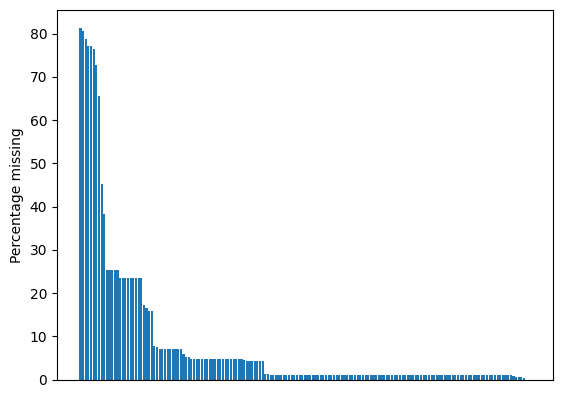

In [62]:
## Look the missing values with help of visulization
missing_data = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0 , ascending=False)

plt.bar(missing_data.index , missing_data.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [ ]:
## As of know >30 % remove the data
dropcolns = missing_data[missing_data[0] >= 30]
df = df.drop(list(dropcolns.index) , axis= 1)  ## Assign back to orginal frame or place inplace = True